In [1]:
import pandas as pd
import numpy as np
from geemap import ml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Project\Updated_netcdf\MODIS\modis_full_dataset.csv")
df.describe()

DEPTH    LATITUDE   LONGITUDE    SALINITY  TEMPERATURE  \
count  459.000000  459.000000  459.000000  459.000000   459.000000   
mean     3.671255   17.813463   13.763921   32.815758    22.075430   
std      4.015191   28.288599   75.596405    5.823072     8.880249   
min      0.000199  -21.568310 -158.990000    6.230000     0.434000   
25%      0.000249    0.651500  -26.036450   32.308002    14.639501   
50%      2.006000   16.835220   11.660300   34.799002    26.575001   
75%      5.708460   51.910000   75.282500   36.534002    28.909501   
max     26.752193   58.880000   91.503000   37.607002    31.066001   

             CPHL  sur_refl_b08  sur_refl_b09  sur_refl_b10  sur_refl_b11  \
count  431.000000    459.000000    459.000000    459.000000    459.000000   
mean     0.350385      0.201929      0.115115      0.071078      0.052499   
std      0.458761      0.183254      0.140187      0.125308      0.107514   
min     -0.000750     -0.010000     -0.010000     -0.010000     -0.010000   
25%      0.080000      0.060300      0.020650      0.002800     -0.003125   
50%      0.151000      0.145000      0.075750      0.027300      0.011750   
75%      0.463550      0.301700      0.152100      0.087850      0.065750   
max      3.815000      0.877500      0.890150      0.908700      0.899900   

       sur_refl_b12  sur_refl_b13  sur_refl_b14  sur_refl_b15  sur_refl_b16  
count    459.000000    459.000000    459.000000    459.000000    459.000000  
mean       0.036283      0.006702      0.008268      0.004286      0.002624  
std        0.088960      0.039729      0.040917      0.029155      0.024738  
min       -0.010000     -0.010000     -0.010000     -0.010000     -0.010000  
25%       -0.010000     -0.010000     -0.010000     -0.010000     -0.010000  
50%        0.004050     -0.004350     -0.004000     -0.004800     -0.004850  
75%        0.039425      0.002300      0.002950      0.000825      0.000400  
max        0.630450      0.480150      0.474450      0.259500      0.186050

In [3]:
feature_names = ['sur_refl_b08', 'sur_refl_b09',  'sur_refl_b10',  'sur_refl_b11',  'sur_refl_b12',  'sur_refl_b13',  'sur_refl_b14',  'sur_refl_b15',  'sur_refl_b16']

label = "SALINITY"

In [4]:
X = df[feature_names]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
n_trees = 100
rf = ensemble.RandomForestRegressor(n_trees, max_depth = 10)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR  

best_n_estimators = 100
best_max_depth = 25
best_min_samples_split = 2
best_min_samples_leaf = 4
best_max_features = 'sqrt'  

rf = RandomForestRegressor(n_estimators=best_n_estimators, 
                               max_depth=best_max_depth, 
                               min_samples_split=best_min_samples_split, 
                               min_samples_leaf=best_min_samples_leaf, 
                               max_features=best_max_features)

# rf_feature_name = ['sur_refl_b08', 'sur_refl_b12',  'sur_refl_b09',  'sur_refl_b11',  'sur_refl_b10',  'sur_refl_b16']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)


# Calculate RMSE and other metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)


# Calculate nRMSE
max_y = y_test.max()
min_y = y_test.min()
nrmse = rmse / (max_y - min_y)

print('RMSE:', rmse)
print('nRMSE:', nrmse)
print('p-value:', p_value)
print('r:', r_value)


observed_values = np.array(y_test)
predicted_values = np.array(y_pred)

# Calculate Mean Error (ME)
mean_error = np.mean(predicted_values - observed_values)

# Calculate Mean Bias Error (MBE)
mbe = np.mean(np.abs(predicted_values - observed_values))

print(f"Mean Error (ME): {mean_error}")
print(f"Mean Bias Error (MBE): {mbe}")

RMSE: 4.467113280720091
nRMSE: 0.1821601381394091
p-value: 3.5238391458894156e-12
r: 0.5479013756625518
Mean Error (ME): -0.96677920982685
Mean Bias Error (MBE): 3.2164772170171005


In [7]:
y_pred = rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)

print('RMSE: ', rmse)
print('p-value: ', p_value)
print('r: ', r_value)

y_line = 1*y_test + 0

RMSE:  4.467113280720091
p-value:  3.5238391458894156e-12
r:  0.5479013756625518


In [9]:
# Load the new data into a DataFrame (replace 'new_data.csv' with your file path)
new_data = pd.read_csv(r"D:\ACADMIA\Project\Project_alpha\bob_image_data.csv")



FileNotFoundError: [Errno 2] No such file or directory: 'D:\\ACADMIA\\Project\\Project_alpha\\bob_image_data.csv'

In [16]:
r"$\textit{\lambda}$"

'$\\textit{\\lambda}$'

In [13]:
# Preprocess the new data: select the same features as in the training data
X_new = new_data[feature_names]

# # Make predictions using the trained model
predictions = rf.predict(X_new)
# np.save(r"D:\ACADMIA\Project\Project_alpha\SALINITY.npy",predictions)

# # Print the predicted values
print(predictions)


[32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
 32.16283422]


In [8]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\ACADMIA\Project\Project_alpha\BOB_cropped_data\MODIS\bob_image_data.npy")
print(new_data[1:,])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
dff = pd.DataFrame(new_data, columns=columns)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27698604 entries, 0 to 27698603
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sur_refl_b08  float64
 1   sur_refl_b09  float64
 2   sur_refl_b10  float64
 3   sur_refl_b11  float64
 4   sur_refl_b12  float64
 5   sur_refl_b13  float64
 6   sur_refl_b14  float64
 7   sur_refl_b15  float64
 8   sur_refl_b16  float64
dtypes: float64(9)
memory usage: 1.9 GB
None


In [22]:
dff.describe()

sur_refl_b08  sur_refl_b09  sur_refl_b10  sur_refl_b11  sur_refl_b12  \
count  2.769860e+07  2.769860e+07  2.769860e+07  2.769860e+07  2.769860e+07   
mean   3.893427e-02  2.757197e-02  1.598865e-02  9.723353e-03  4.795226e-03   
std    9.864094e-02  6.756322e-02  4.277845e-02  3.184834e-02  2.180679e-02   
min   -1.000000e-02 -1.000000e-02 -1.000000e-02 -1.000000e-02 -1.000000e-02   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.080000e-02  1.580000e-02  8.500000e-03  0.000000e+00  0.000000e+00   
max    1.600000e+00  1.600000e+00  1.600000e+00  2.019000e-01  1.544000e-01   

       sur_refl_b13  sur_refl_b14  sur_refl_b15  sur_refl_b16  
count  2.769860e+07  2.769860e+07  2.769860e+07  2.769860e+07  
mean  -5.146497e-04 -1.051771e-06 -2.353174e-04 -1.202530e-04  
std    9.268527e-03  1.029981e-02  9.840601e-03  9.638620e-03  
min   -1.000000e-02 -1.000000e-02 -1.000000e-02 -1.000000e-02  
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
max    8.500000e-02  8.830000e-02  8.380000e-02  7.960000e-02

In [10]:
# Preprocess the new data: select the same features as in the training data
X_new = dff[columns]

In [11]:
# Make predictions using the trained model
predictions = rf.predict(X_new)



In [21]:
np.save(r"D:\ACADMIA\Project\Project_alpha\SALINITY.npy",predictions)

# Print the predicted values
print(predictions) 

[32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
 32.16283422]


In [3]:
salinity=np.load(r"D:\ACADMIA\Project\Project_alpha\BOB_cropped_data\MODIS\SALINITY.npy")

In [7]:
file_name = r"D:\ACADMIA\Project\Project_alpha\BOB_cropped_data\MODIS\modis_bob_SALINITY.bin"
salinity.tofile(file_name)

In [10]:
print(predictions.shape)

(27698604,)


In [12]:
data=np.reshape(predictions,(4398,6298))

In [12]:
print(data.shape) 

(4398, 6298)


In [28]:
print(data)

[[32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
  32.16283422]
 [32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
  32.16283422]
 [32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
  32.16283422]
 ...
 [32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
  32.16283422]
 [32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
  32.16283422]
 [32.16283422 32.16283422 32.16283422 ... 32.16283422 32.16283422
  32.16283422]]


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import geemap
geemap.ee_initialize()


In [38]:
# salinity_feature = geemap.ee.FeatureCollection([geemap.ee.Feature(None, {'salinity': data.tolist()})])

# # Visualize the predicted salinity map using geemap
# Map = geemap.Map()
# Map.centerObject(salinity_feature, 6)
# Map.addLayer(salinity_feature, {'min': 0, 'max': 40}, 'Predicted Salinity')
# Map

# # Display the matplotlib figure
# plt.imshow(predicted_salinity_map, cmap='viridis', vmin=0, vmax=40)
# plt.colorbar(label='Predicted Salinity')
# plt.title('Predicted Salinity Map')
# plt.show()


In [13]:
from osgeo import gdal
import numpy as np


path = r"D:\ACADMIA\Project\Project_alpha\MODIS_BOB_cropped.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

In [14]:
print(all_pixel_bands.shape)

(4398, 6298, 9)


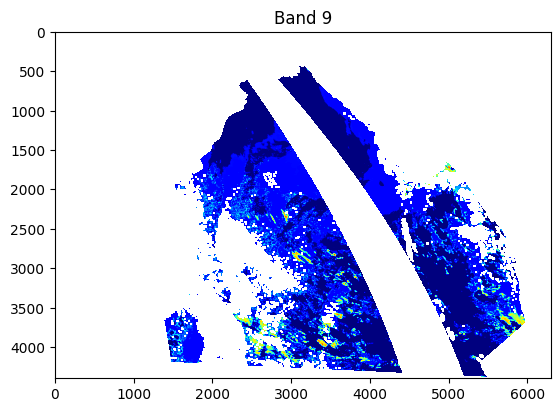

In [15]:
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

In [15]:
print(np.shape(band_data))

(4398, 6298)


In [16]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

Image saved successfully to C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission\bob_modis_cropped_image_wc.pdf


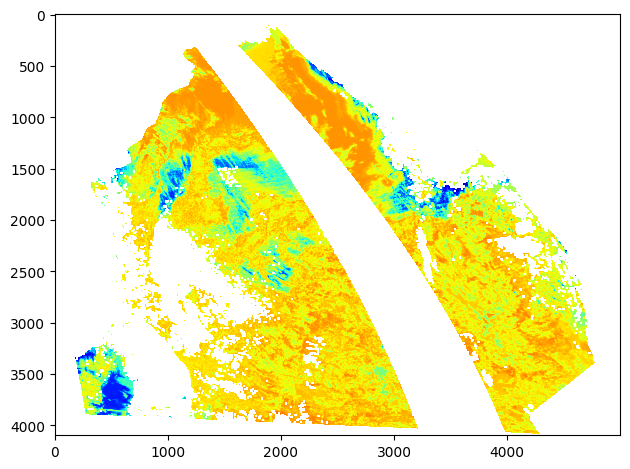

In [18]:
# Visualize the predicted salinity map using matplotlib
plt.imshow(data[300:,1200:6200], aspect="auto", cmap='jet', vmin=20, vmax=40)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
# plt.title('Predicted Salinity Map')

# Specify the directory and filename for saving the image
save_directory = r'C:\Users\lenovo\OneDrive\Project\Results\Salinity_final_submission'
file_name = 'bob_modis_cropped_image_wc.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

## LAplace

In [4]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\ACADMIA\Project\Project_alpha\BOB_cropped_data\MODIS\bob_image_data.npy")
print(new_data[1:,])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
dff = pd.DataFrame(new_data, columns=columns)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27698604 entries, 0 to 27698603
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sur_refl_b08  float64
 1   sur_refl_b09  float64
 2   sur_refl_b10  float64
 3   sur_refl_b11  float64
 4   sur_refl_b12  float64
 5   sur_refl_b13  float64
 6   sur_refl_b14  float64
 7   sur_refl_b15  float64
 8   sur_refl_b16  float64
dtypes: float64(9)
memory usage: 1.9 GB
None


In [10]:
# Preprocess the new data: select the same features as in the training data
X_nue = dff[feature_names]

# # # Make predictions using the trained model
# predictions = rf.predict(X_new)
# # np.save(r"D:\ACADMIA\Project\Project_alpha\SALINITY.npy",predictions)

In [5]:
data=np.reshape(predictions,(4398,6298))

NameError: name 'predictions' is not defined

In [11]:
import numpy as np
from sklearn.svm import SVR

# Define your Laplacian kernel function
def laplacian_kernel(xi, xj, gamma):
    return np.exp(-gamma * np.linalg.norm(xi - xj))

feature_names = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
label = "SALINITY"

X=df[feature_names]
y=df[label]

# Define the Laplacian matrix L based on the Laplacian kernel
gamma = 1.0  # Adjust this as needed


# Example usage:

# Calculate the Laplacian matrix L based on the Laplacian kernel
n_samples = len(X)
laplacian_matrix = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in range(n_samples):
        laplacian_matrix[i, j] = laplacian_kernel(X.iloc[i], X.iloc[j], gamma)

# Define hyperparameters
C = 1.0  # Adjust this as needed

# Create the Laplacian Embedded Regression model
svr = SVR(C=C, kernel='precomputed')
svr.fit(laplacian_matrix, y)

# Now, you can make salinity predictions using the trained model
# Example: Predict the salinity for a new data point (x_new)
# x_new = ...  # Your new data point

# Calculate the Laplacian kernel values between x_new and all data points in X
laplacian_kernel_values = np.array([laplacian_kernel(X_nue, xi, gamma) for xi in X])

# Use the Laplacian Embedded Regression model to predict salinity
salinity_prediction = svr.predict([laplacian_kernel_values])

# salinity_prediction contains the predicted salinity value for x_new


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U12')) -> None

# Feb

In [24]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Feb23.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

In [25]:
print(all_pixel_bands.shape)

(4152, 3597, 9)


In [26]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

In [27]:
# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (14934744, 9)


In [28]:
#array
np_array=dff.to_numpy()


np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Feb23.npy",np_array)

print("Data exported")

Data exported


In [29]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Feb23.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [30]:
dff[columns] = dff[columns].fillna(0)

In [31]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

X_new = dff[columns]

In [32]:
# Make predictions using the trained model
predictions = rf.predict(X_new)

In [36]:
data=np.reshape(predictions,(4152, 3597))

In [37]:
print(predictions.shape)

(14934744,)


In [38]:
print(data)

[[29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 ...
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]]


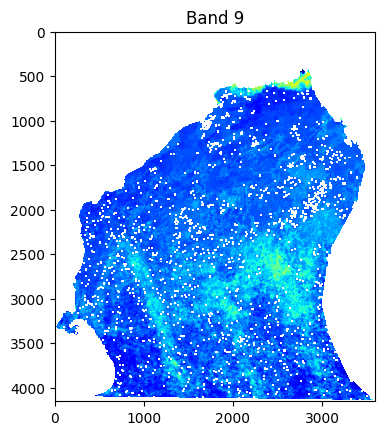

In [39]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

In [40]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Feb23.pdf


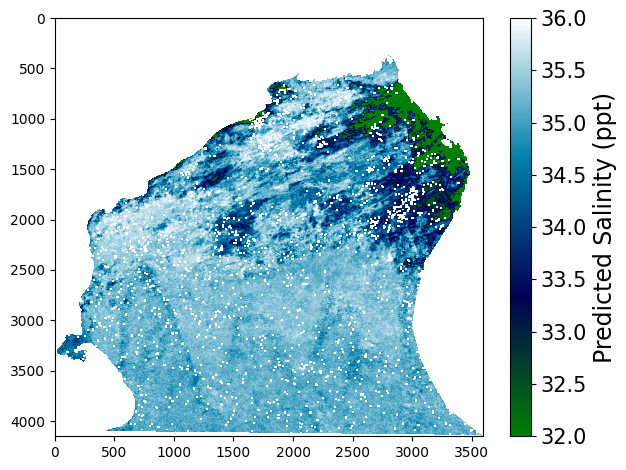

In [41]:
# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite'
file_name = 'MODIS_BOB_Composite_Mean_Feb23.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

# Jan

In [42]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Jan23.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
print(all_pixel_bands.shape)

(4152, 3597, 9)


In [43]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (14934744, 9)


In [44]:
#array
np_array=dff.to_numpy()

np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Jan23.npy",np_array)

print("Data exported")

Data exported


In [45]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Jan23.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [46]:
dff[columns] = dff[columns].fillna(0)

In [47]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
X_new = dff[columns]

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(4152, 3597))
print(predictions.shape)
print(data)

(14934744,)
[[29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 ...
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]]


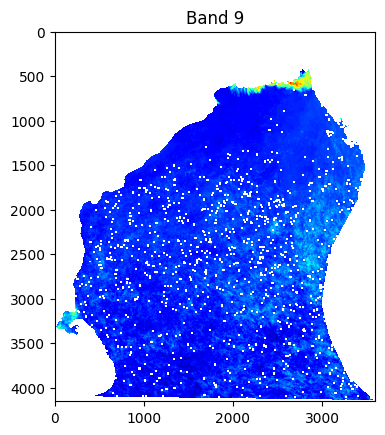

In [48]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Jan23.pdf


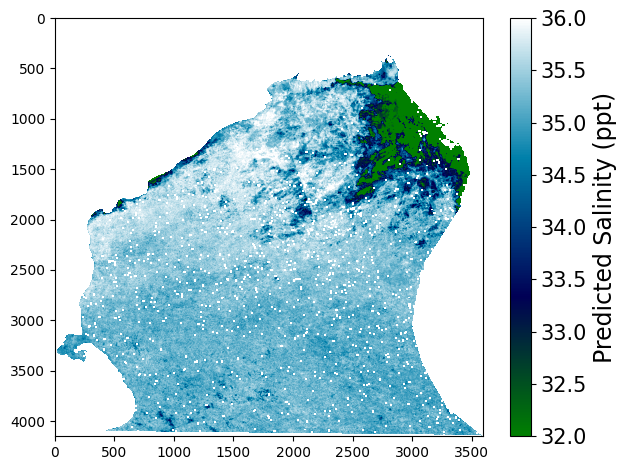

In [49]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite"
file_name = 'MODIS_BOB_Composite_Mean_Jan23.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()


# DEC

In [50]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Dec22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

In [51]:
print(all_pixel_bands.shape)

(4152, 3597, 9)


In [52]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

In [53]:
# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (14934744, 9)


In [54]:
#array
np_array=dff.to_numpy()

np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Dec22.npy",np_array)

print("Data exported")

Data exported


In [55]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Dec22.npy")
print(new_data[1:,])


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [56]:
dff[columns] = dff[columns].fillna(0)

In [57]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
X_new = dff[columns]

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(4152, 3597))
print(predictions.shape)
print(data)

(14934744,)
[[29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 ...
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]]


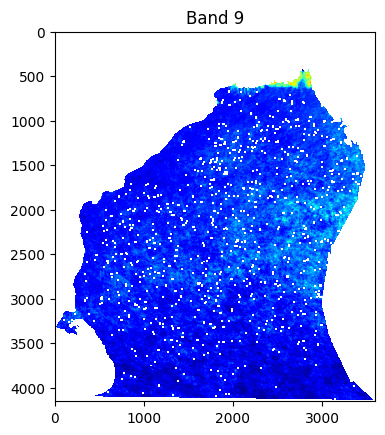

In [58]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Dec22.pdf


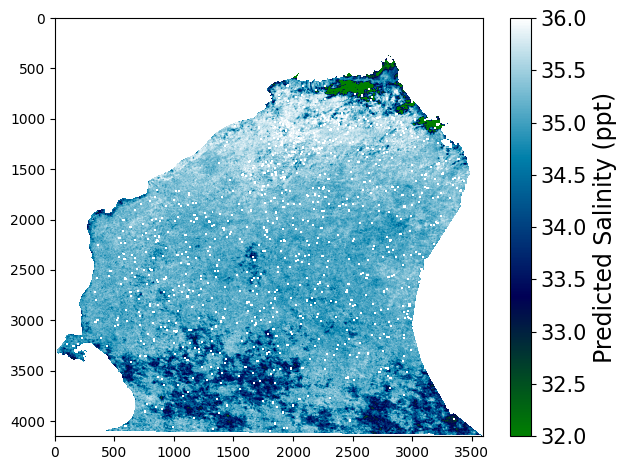

In [59]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite"
file_name = 'MODIS_BOB_Composite_Mean_Dec22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

# NOV

In [74]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Nov22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
print(all_pixel_bands.shape)

(4152, 3597, 9)


In [75]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (14934744, 9)


In [76]:
#array
np_array=dff.to_numpy()

np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Nov22.npy",np_array)

print("Data exported")

Data exported


In [77]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Nov22.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [78]:
dff[columns] = dff[columns].fillna(0)

In [79]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
X_new = dff[columns]

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(4152, 3597))
print(predictions.shape)
print(data)

(14934744,)
[[29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 ...
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]]


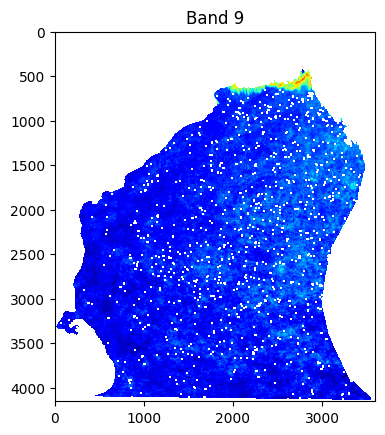

In [80]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Nov22.pdf


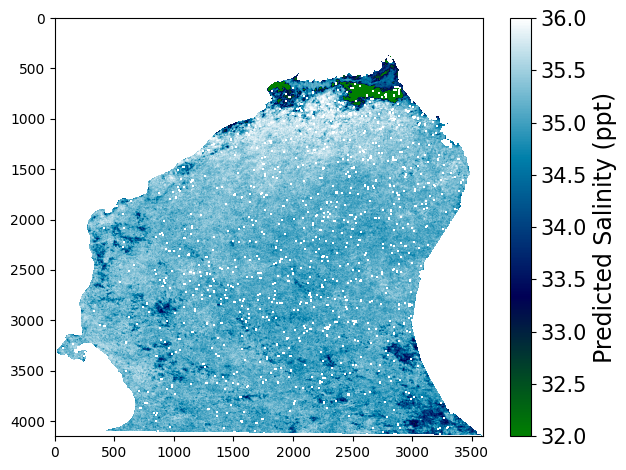

In [81]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite"
file_name = 'MODIS_BOB_Composite_Mean_Nov22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

# OCT

In [82]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Oct22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
print(all_pixel_bands.shape)

(4152, 3597, 9)


In [83]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (14934744, 9)


In [84]:
#array
np_array=dff.to_numpy()

np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Oct22.npy",np_array)

print("Data exported")

Data exported


In [85]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Oct22.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [86]:
dff[columns] = dff[columns].fillna(0)

In [87]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
X_new = dff[columns]

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(4152, 3597))
print(predictions.shape)
print(data)

(14934744,)
[[29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 ...
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]]


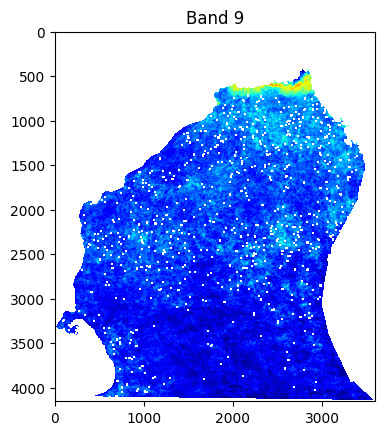

In [88]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Oct22.pdf


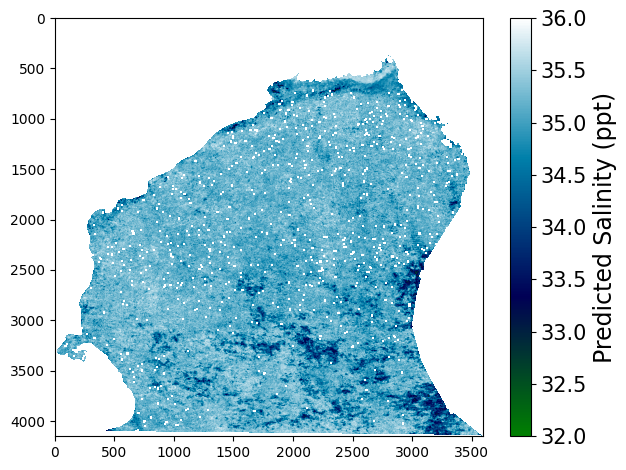

In [89]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite"
file_name = 'MODIS_BOB_Composite_Mean_Oct22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

# SEPT

In [90]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Sept22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
print(all_pixel_bands.shape)

(4152, 3597, 9)


In [91]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (14934744, 9)


In [92]:
#array
np_array=dff.to_numpy()

np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Sept22.npy",np_array)

print("Data exported")

Data exported


In [93]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Sept22.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [94]:
dff[columns] = dff[columns].fillna(0)

In [95]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
X_new = dff[columns]

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(4152, 3597))
print(predictions.shape)
print(data)

(14934744,)
[[29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 ...
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]]


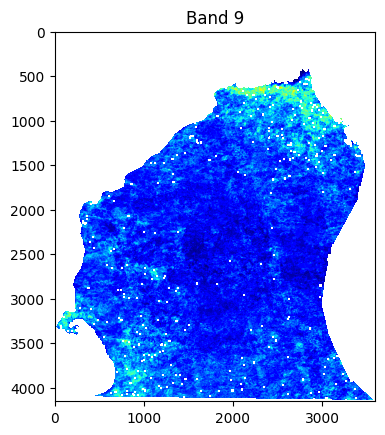

In [96]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_Sept22.pdf


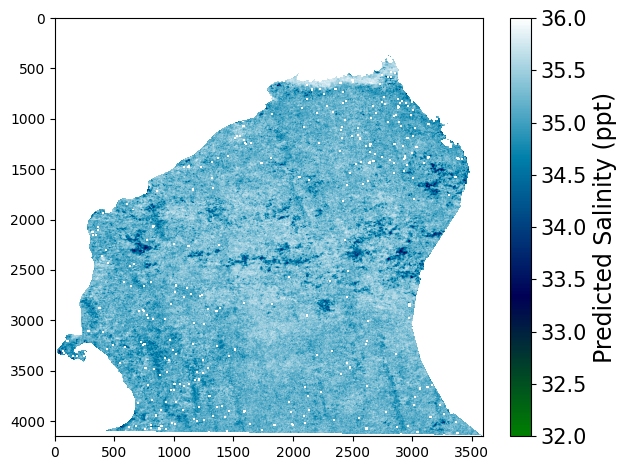

In [97]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite"
file_name = 'MODIS_BOB_Composite_Mean_Sept22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

# AUG

In [98]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_August22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
print(all_pixel_bands.shape)

(4152, 3597, 9)


In [99]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (14934744, 9)


In [100]:
#array
np_array=dff.to_numpy()

np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_August22.npy",np_array)

print("Data exported")

Data exported


In [101]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_August22.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [102]:
dff[columns] = dff[columns].fillna(0)

In [103]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
X_new = dff[columns]

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(4152, 3597))
print(predictions.shape)
print(data)

(14934744,)
[[29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 ...
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]]


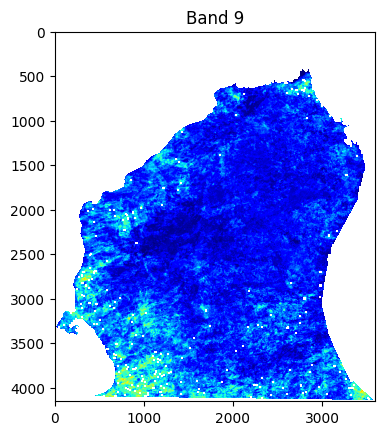

In [104]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_August22.pdf


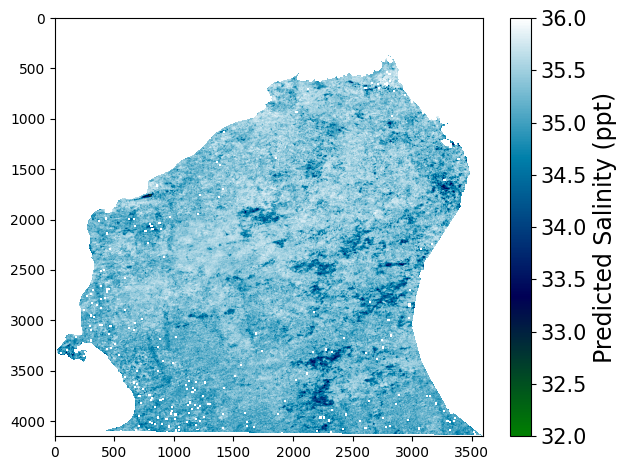

In [105]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite"
file_name = 'MODIS_BOB_Composite_Mean_August22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

# July

In [147]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_July22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
print(all_pixel_bands.shape)

(4152, 3597, 9)


In [148]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (14934744, 9)


In [149]:
#array
np_array=dff.to_numpy()

np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_July22.npy",np_array)

print("Data exported")

Data exported


In [150]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_July22.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [151]:
dff[columns] = dff[columns].fillna(0)

In [152]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
X_new = dff[columns]

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(4152, 3597))
print(predictions.shape)
print(data)

(14934744,)
[[29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 ...
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]]


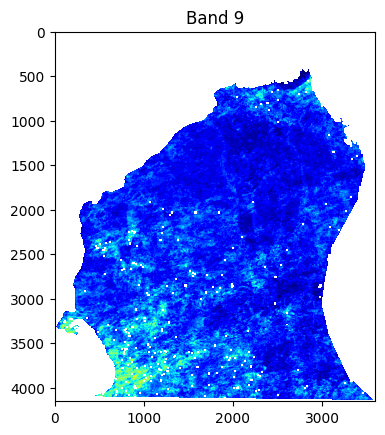

In [153]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_July22.pdf


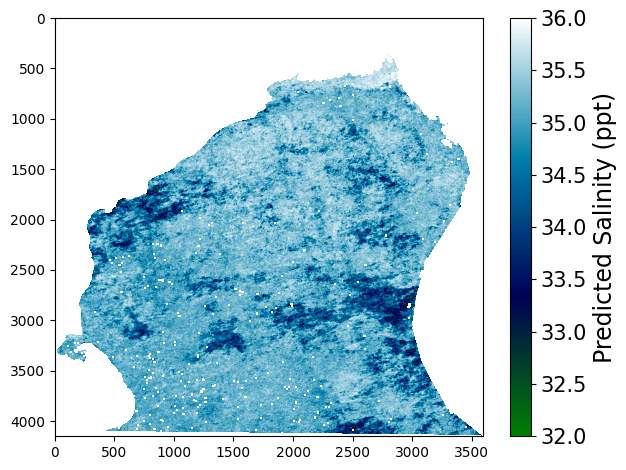

In [154]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite"
file_name = 'MODIS_BOB_Composite_Mean_July22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

# June

In [114]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_June22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
print(all_pixel_bands.shape)

(4152, 3597, 9)


In [115]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (14934744, 9)


In [116]:
#array
np_array=dff.to_numpy()

np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_June22.npy",np_array)

print("Data exported")

Data exported


In [117]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_June22.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [118]:
dff[columns] = dff[columns].fillna(0)

In [119]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
X_new = dff[columns]

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(4152, 3597))
print(predictions.shape)
print(data)

(14934744,)
[[29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 ...
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]]


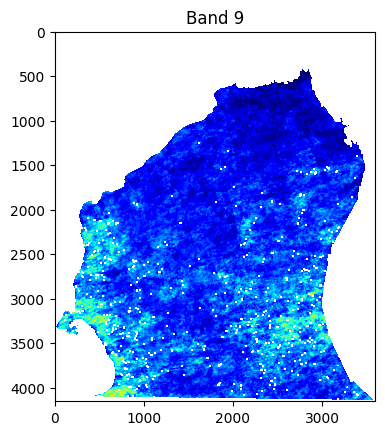

In [120]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_June22.pdf


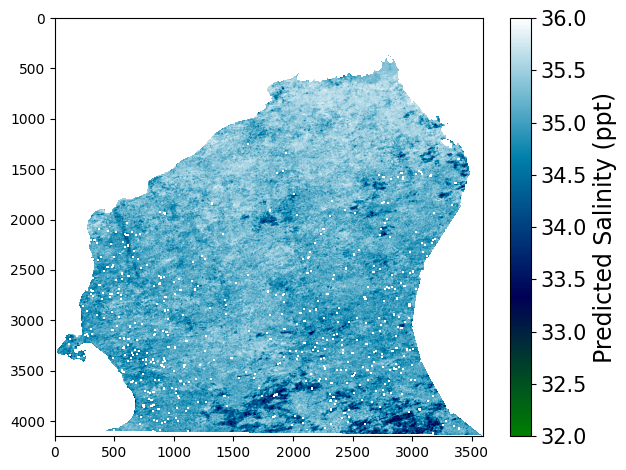

In [121]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite"
file_name = 'MODIS_BOB_Composite_Mean_June22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

# May

In [122]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_May22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
print(all_pixel_bands.shape)

(4152, 3597, 9)


In [123]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (14934744, 9)


In [124]:
#array
np_array=dff.to_numpy()

np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_May22.npy",np_array)

print("Data exported")

Data exported


In [125]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_May22.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [126]:
dff[columns] = dff[columns].fillna(0)

In [127]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
X_new = dff[columns]

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(4152, 3597))
print(predictions.shape)
print(data)

(14934744,)
[[29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 ...
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]]


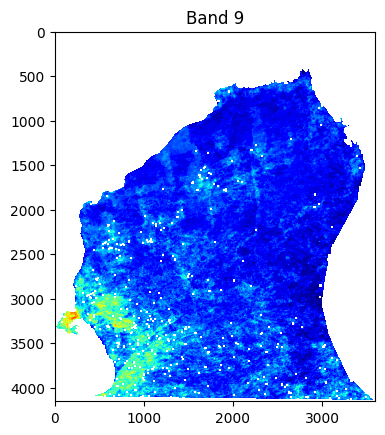

In [128]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_May22.pdf


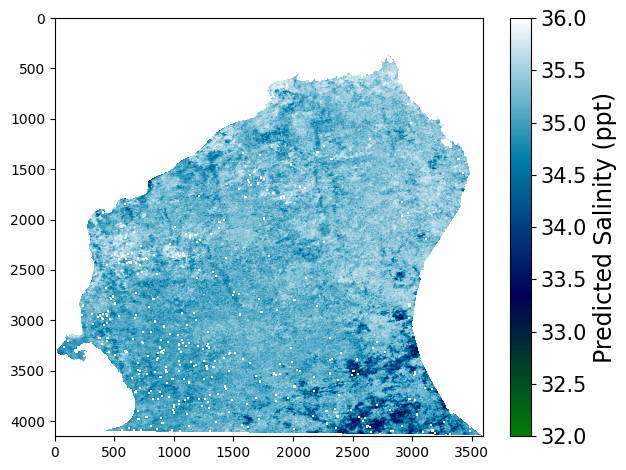

In [129]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite"
file_name = 'MODIS_BOB_Composite_Mean_May22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

# April

In [130]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_April22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
print(all_pixel_bands.shape)

(4152, 3597, 9)


In [131]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (14934744, 9)


In [132]:
#array
np_array=dff.to_numpy()

np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_April22.npy",np_array)

print("Data exported")

Data exported


In [133]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_April22.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [134]:
dff[columns] = dff[columns].fillna(0)

In [135]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
X_new = dff[columns]

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(4152, 3597))
print(predictions.shape)
print(data)

(14934744,)
[[29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 ...
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]]


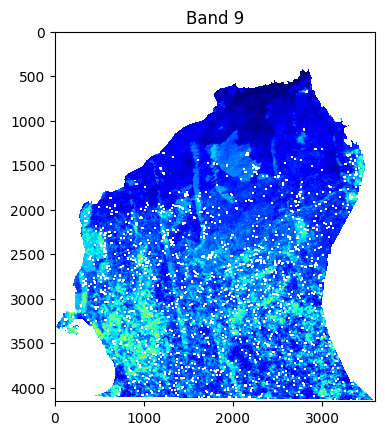

In [136]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_April22.pdf


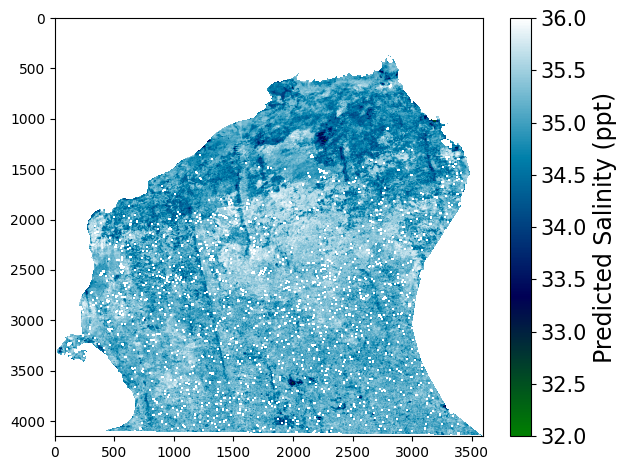

In [137]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite"
file_name = 'MODIS_BOB_Composite_Mean_April22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

# March

In [138]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_March22.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
print(all_pixel_bands.shape)

(4152, 3597, 9)


In [139]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (14934744, 9)


In [141]:
#array
np_array=dff.to_numpy()

np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_March22.npy",np_array)

print("Data exported")

Data exported


In [142]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_March22.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [143]:
dff[columns] = dff[columns].fillna(0)

In [144]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
X_new = dff[columns]

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(4152, 3597))
print(predictions.shape)
print(data)

(14934744,)
[[29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 ...
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]]


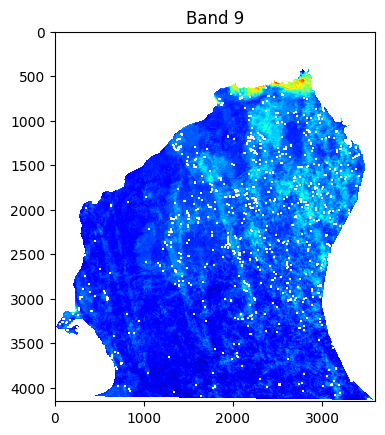

In [145]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_BOB_Composite_Mean_March22.pdf


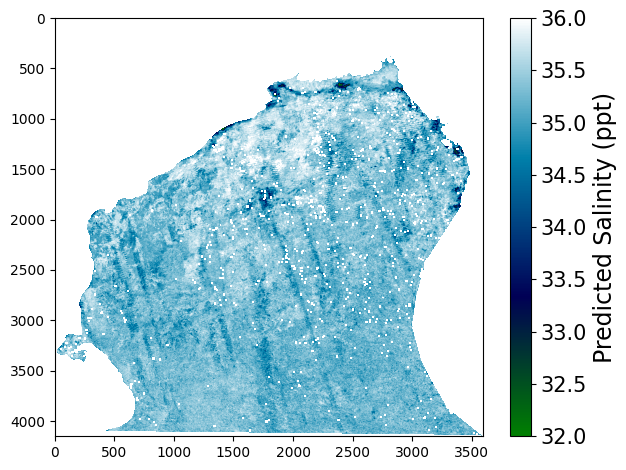

In [146]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite"
file_name = 'MODIS_BOB_Composite_Mean_March22.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

# Jan

In [115]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\MODIS_BOB_JAN_Image.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
print(all_pixel_bands.shape)

(4148, 5051, 9)


In [116]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (20951548, 9)


In [117]:
#array
np_array=dff.to_numpy()

np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\modis_bob_jan.npy",np_array)

print("Data exported")

Data exported


In [118]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\modis_bob_jan.npy")
print(new_data[1:,])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [119]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
X_new = dff[columns]

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(4148, 5051))
print(predictions.shape)
print(data)

(20951548,)
[[29.38826386 29.38826386 29.38826386 ... 29.38826386 29.38826386
  29.38826386]
 [29.38826386 29.38826386 29.38826386 ... 29.38826386 29.38826386
  29.38826386]
 [29.38826386 29.38826386 29.38826386 ... 29.38826386 29.38826386
  29.38826386]
 ...
 [29.38826386 29.38826386 29.38826386 ... 29.38826386 29.38826386
  29.38826386]
 [29.38826386 29.38826386 29.38826386 ... 29.38826386 29.38826386
  29.38826386]
 [29.38826386 29.38826386 29.38826386 ... 29.38826386 29.38826386
  29.38826386]]


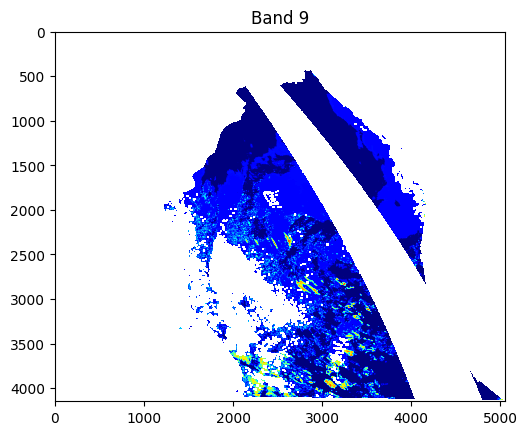

In [120]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\MODIS_BOB_Jan.pdf


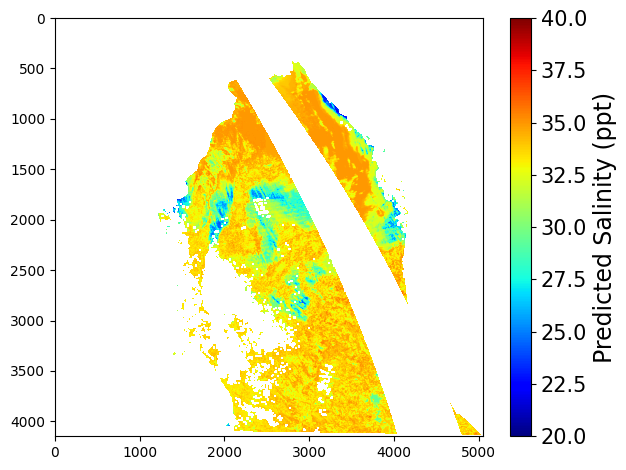

In [121]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
plt.imshow(data, aspect="auto", cmap='jet', vmin=20, vmax=40)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS'
file_name = 'MODIS_BOB_Jan.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

# Complete Year

In [157]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\MODIS_Composite_mean.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
print(all_pixel_bands.shape)

(4152, 3597, 9)


In [158]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (14934744, 9)


In [159]:
#array
np_array=dff.to_numpy()

np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\modis_bob_composite_mean.npy",np_array)

print("Data exported")

Data exported


In [160]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\modis_bob_composite_mean.npy")
print(new_data[1:,])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [161]:
dff = dff.fillna(0)

In [162]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
X_new = dff[columns]

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(4152, 3597))
print(predictions.shape)
print(data)

(14934744,)
[[29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 ...
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]
 [29.19914293 29.19914293 29.19914293 ... 29.19914293 29.19914293
  29.19914293]]


In [163]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

SyntaxError: invalid syntax (2602577400.py, line 5)

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\MODIS_BOB_Composite_Mean_March_22_Feb_23_delta.pdf


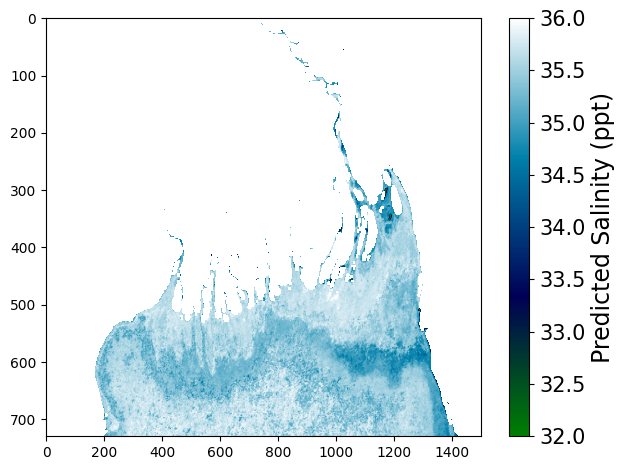

In [190]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
# plt.imshow(data[100:1300,1200:3450], aspect="auto", cmap='ocean', vmin=32, vmax=36)
plt.imshow(data[100:830,1600:3100], aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r'D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS'
file_name = 'MODIS_BOB_Composite_Mean_March_22_Feb_23_delta.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()

# AO_FULL_Composite

In [8]:
from osgeo import gdal
import numpy as np


path = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_AO_Mean_Composite_March22_Feb23.tif"
dataset = gdal.Open(path)

# Get image properties
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount

all_pixel_bands = np.zeros((height, width, num_bands))

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
print(all_pixel_bands.shape)

(5721, 6640, 9)


In [9]:
for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data

# Reshape the array to have dimensions 27698604x9
reshaped_pixel_bands = all_pixel_bands.reshape(-1, num_bands)

# Create column names
column_names = [f"sur_refl_b{band_num+7}" for band_num in range(1, num_bands + 1)]
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']

# Create a pandas DataFrame with the reshaped data and column names
dff = pd.DataFrame(data=reshaped_pixel_bands, columns=columns)

print("Shape of DataFrame:", dff.shape)

Shape of DataFrame: (37987440, 9)


In [205]:
#array
np_array=dff.to_numpy()

np.save(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_AO_Mean_Composite_March22_Feb23.npy",np_array)

print("Data exported")

Data exported


In [10]:
import numpy as np

# Load the new data as a NumPy array (replace 'new_data.npy' with your file path)
new_data = np.load(r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_AO_Mean_Composite_March22_Feb23.npy")
print(new_data[1:,])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
# columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
# dff = pd.DataFrame(data=new_data, columns=columns)
dff = dff.fillna(0)

In [12]:
# Preprocess the new data: select the same features as in the training data
columns=['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16']
X_new = dff[columns]

# Make predictions using the trained model
predictions = rf.predict(X_new)

data=np.reshape(predictions,(5721, 6640))
print(predictions.shape)
print(data)

(37987440,)
[[29.47869517 29.47869517 29.47869517 ... 29.47869517 29.47869517
  29.47869517]
 [29.47869517 29.47869517 29.47869517 ... 29.47869517 29.47869517
  29.47869517]
 [29.47869517 29.47869517 29.47869517 ... 29.47869517 29.47869517
  29.47869517]
 ...
 [29.47869517 29.47869517 29.47869517 ... 29.47869517 29.47869517
  29.47869517]
 [29.47869517 29.47869517 29.47869517 ... 29.47869517 29.47869517
  29.47869517]
 [29.47869517 29.47869517 29.47869517 ... 29.47869517 29.47869517
  29.47869517]]


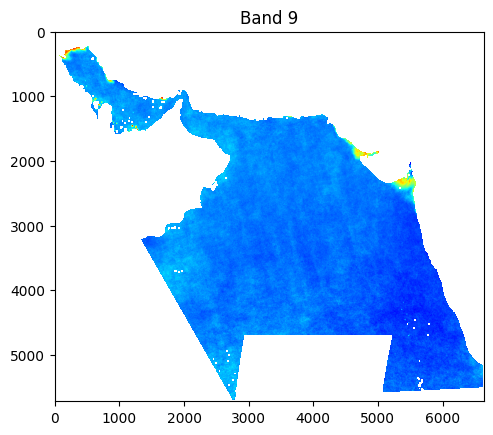

In [13]:
from osgeo import gdal
import numpy as np

for band_num in range(1, num_bands + 1):
    band = dataset.GetRasterBand(band_num)
    band_data = band.ReadAsArray() * 0.0001
    all_pixel_bands[:, :, band_num - 1] = band_data
    
    
band_data = np.where(band_data == 0, np.nan, band_data)

# Display the image using matplotlib
plt.figure()
plt.imshow(band_data, cmap='jet')  
plt.title(f"Band {band_num}")
plt.show()

Image saved successfully to D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite\MODIS_AO_Mean_Composite_March22_Feb23_gulf_crop.pdf


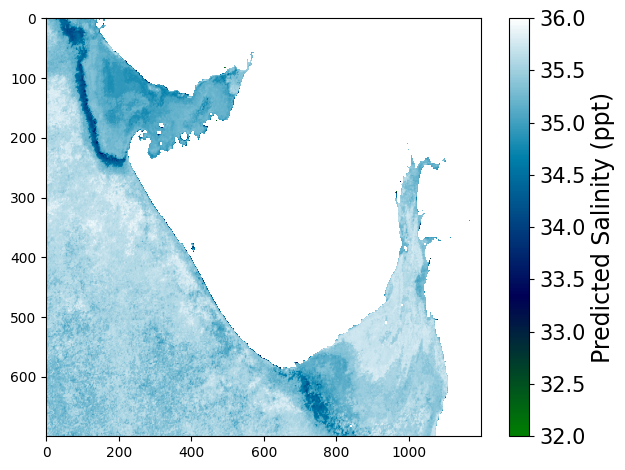

In [32]:
# Identify NaN values in band_data
nan_locations = np.isnan(band_data)

# Update corresponding locations in data with NaN
data[nan_locations] = np.nan

# Visualize the predicted salinity map using matplotlib
# plt.imshow(data[800:4000,4000:6200], aspect="auto", cmap='ocean', vmin=32, vmax=36)
plt.imshow(data[1750:2450,4500:5700], aspect="auto", cmap='ocean', vmin=32, vmax=36)
# plt.colorbar(label='Predicted Salinity (ppt)')
# plt.colorbar().set_label(label='Predicted Salinity (ppt)',size=17)
cbar = plt.colorbar()
cbar.set_label(label='Predicted Salinity (ppt)', size=17)
cbar.ax.tick_params(labelsize=15)  # Adjust the tick size as needed

# Specify the directory and filename for saving the image
save_directory = r"D:\MTP\Project\Project_alpha\BOB_cropped_data\MODIS\monthly_composite"
file_name = 'MODIS_AO_Mean_Composite_March22_Feb23_gulf_crop.pdf'

# Combine the directory and filename to create the full file path
full_file_path = os.path.join(save_directory, file_name)

# Adjust the layout to ensure all elements fit within the saved image
plt.tight_layout()

# Save the plot as an image with the specified directory
plt.savefig(full_file_path, dpi=600, bbox_inches='tight', pad_inches=0)

# Check if the image file exists
if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()